Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

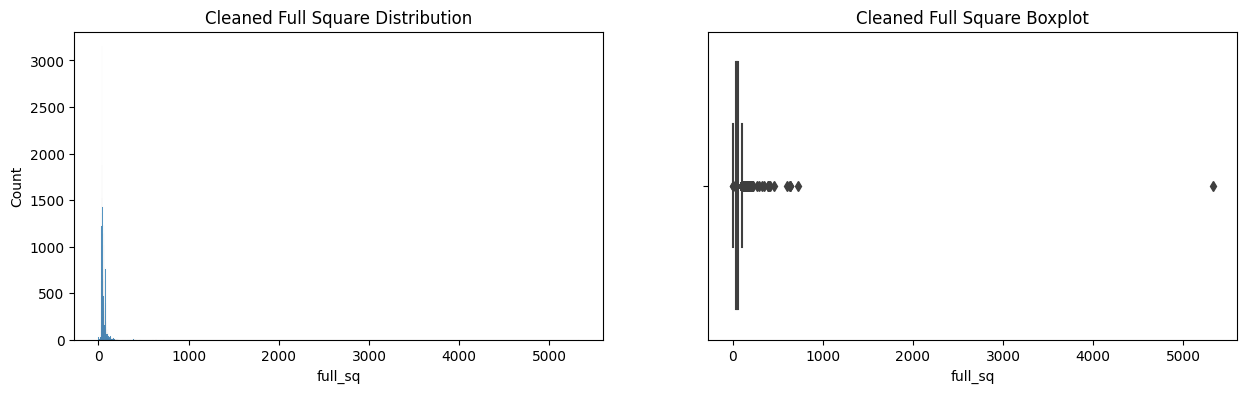

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('sber_data.csv')
outliers = sber_data[sber_data['life_sq']>sber_data['full_sq']]
cleaned = sber_data.drop(outliers.index, axis =0)
# Это функция для поиска вбросов по методу Тьюки. Ее результат используют для поиска некорректных данных
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale = False): # data это наша таблица, feature это то, по какому признаку ищем, 1 и 6 регулируем
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
# Это конец фунции, дальше ее применение (в нашем случае мы хотим найти значения по outliers и cleaned)
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
# так строится график, по которому можно судить о наличии вбросов и регулировать left и right. В данном, уже норм
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))# для создания нескольких графиков вместе
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);# гистограмма - данные очищенные и х - полная площадь
histplot.set_title('Cleaned Full Square Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]); # коробчатая диаграмма
boxplot.set_title('Cleaned Full Square Boxplot')



